# **Bicycle Theft in Berlin**

#### I have  hired by the police office in berlin as a data scientist to develop a machine learning pipeline to predict bicycle thefts in Berlin which  this problem caused financial losses and trouble to individuals and government.
#### Predicting bicycle thefts can help the police  in assigning resources more effectively for crime prevention ,so the police provided me with daily updated data on bicycle theft crimes in berlin (https://www.kaggle.com/datasets/arnewo/bicycle-thefts-in-berlin).
#### Accordingly this problem can be formulated as a binary classification task, where the model predicts whether a specific location and time are at risk of experiencing a bicycle theft.

##### *To start my analysis to build a comprehensive ML pipline I will follow the following steps :*



## 1.Import libraries :
In this section I will import all important libraries that using in this pipline .

In [9]:
import pandas as pd
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import matplotlib.pyplot as plt
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree



C:\Users\user\AppData\Local\Temp\ipykernel_39080\3189075872.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 2. Data collection :
I will load the dataset sent by Berlin police :

In [10]:
df = pd.read_csv("bicycle_thefts_in_berlin.csv")
df.head()
  

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
0,25.11.2023,23.11.2023,15,25.11.2023,8,10100207,5500,Nein,Fahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...
1,25.11.2023,25.11.2023,9,25.11.2023,14,2400521,2400,Nein,Herrenfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrr�dern
2,25.11.2023,24.11.2023,13,24.11.2023,22,6300630,2399,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrr�dern
3,25.11.2023,24.11.2023,18,25.11.2023,10,9301126,630,Nein,Damenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...
4,25.11.2023,24.11.2023,18,25.11.2023,10,9301126,200,Nein,Herrenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...


## 3. Data Exploration:
Checking  the dataset for data quality issues (missing values, outliers, or imbalanced classes) ,and i will assess whether the dataset requires sampling or balancing techniques .And then I will determine suitable evaluation metrics, according to this problem :


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43136 entries, 0 to 43135
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ANGELEGT_AM            43136 non-null  object
 1   TATZEIT_ANFANG_DATUM   43136 non-null  object
 2   TATZEIT_ANFANG_STUNDE  43136 non-null  int64 
 3   TATZEIT_ENDE_DATUM     43136 non-null  object
 4   TATZEIT_ENDE_STUNDE    43136 non-null  int64 
 5   LOR                    43136 non-null  int64 
 6   SCHADENSHOEHE          43136 non-null  int64 
 7   VERSUCH                43136 non-null  object
 8   ART_DES_FAHRRADS       43136 non-null  object
 9   DELIKT                 43136 non-null  object
 10  ERFASSUNGSGRUND        43136 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.6+ MB


In [12]:
df.dtypes

ANGELEGT_AM              object
TATZEIT_ANFANG_DATUM     object
TATZEIT_ANFANG_STUNDE     int64
TATZEIT_ENDE_DATUM       object
TATZEIT_ENDE_STUNDE       int64
LOR                       int64
SCHADENSHOEHE             int64
VERSUCH                  object
ART_DES_FAHRRADS         object
DELIKT                   object
ERFASSUNGSGRUND          object
dtype: object

##### Checking for explicit missing values(all the data) ,checking if  the dataset suffer from any data quality issues(missing data explicitly or implicitly)? No missing data so we will not use **X_train = X_train.dropna()**

In [13]:
df.isnull().sum()

ANGELEGT_AM              0
TATZEIT_ANFANG_DATUM     0
TATZEIT_ANFANG_STUNDE    0
TATZEIT_ENDE_DATUM       0
TATZEIT_ENDE_STUNDE      0
LOR                      0
SCHADENSHOEHE            0
VERSUCH                  0
ART_DES_FAHRRADS         0
DELIKT                   0
ERFASSUNGSGRUND          0
dtype: int64

## 4.Data Preprocessing and Feature Engineering
To handle missing values(we do not have them in this model), outliers(we have a unkown values(Unbekannt)),to balance data  and encode categorical variables .
To Perform feature engineering to extract relevant features such as time of day, day of the week, or location characteristics.Scale or normalize numerical features if required.

##### I have removed all  "unkown" values  because Unkown is not a useful answer:

In [14]:

df = df[df['VERSUCH'] != 'Unbekannt']

##### I have extracted information (the day of the week , the month , the year from these date/time features and then Converting to datetime objects:

In [15]:

df['ANGELEGT_AM'] = pd.to_datetime(df['ANGELEGT_AM'])
df['TATZEIT_ANFANG_DATUM'] = pd.to_datetime(df['TATZEIT_ANFANG_DATUM'])
df['TATZEIT_ENDE_DATUM'] = pd.to_datetime(df['TATZEIT_ENDE_DATUM'])


df['ANGELEGT_AM_dayofweek'] = df['ANGELEGT_AM'].dt.dayofweek
df['TATZEIT_ANFANG_DATUM_dayofweek'] = df['TATZEIT_ANFANG_DATUM'].dt.dayofweek
df['TATZEIT_ENDE_DATUM_dayofweek'] = df['TATZEIT_ENDE_DATUM'].dt.dayofweek

df['ANGELEGT_AM_month'] = df['ANGELEGT_AM'].dt.month
df['TATZEIT_ANFANG_DATUM_month'] = df['TATZEIT_ANFANG_DATUM'].dt.month
df['TATZEIT_ENDE_DATUM_month'] = df['TATZEIT_ENDE_DATUM'].dt.month

df['ANGELEGT_AM_year'] = df['ANGELEGT_AM'].dt.year
df['TATZEIT_ANFANG_DATUM_year'] = df['TATZEIT_ANFANG_DATUM'].dt.year
df['TATZEIT_ENDE_DATUM_year'] = df['TATZEIT_ENDE_DATUM'].dt.year



C:\Users\user\AppData\Local\Temp\ipykernel_39080\399589.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ANGELEGT_AM'] = pd.to_datetime(df['ANGELEGT_AM'])
C:\Users\user\AppData\Local\Temp\ipykernel_39080\399589.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TATZEIT_ANFANG_DATUM'] = pd.to_datetime(df['TATZEIT_ANFANG_DATUM'])
C:\Users\user\AppData\Local\Temp\ipykernel_39080\399589.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TATZEIT_ENDE_DATUM'] = pd.to_datetime(df['TATZEIT_ENDE_DATUM'])


##### To show new columns: :

In [16]:

df.head()

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,ANGELEGT_AM_dayofweek,TATZEIT_ANFANG_DATUM_dayofweek,TATZEIT_ENDE_DATUM_dayofweek,ANGELEGT_AM_month,TATZEIT_ANFANG_DATUM_month,TATZEIT_ENDE_DATUM_month,ANGELEGT_AM_year,TATZEIT_ANFANG_DATUM_year,TATZEIT_ENDE_DATUM_year
0,2023-11-25,2023-11-23,15,2023-11-25,8,10100207,5500,Nein,Fahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...,5,3,5,11,11,11,2023,2023,2023
1,2023-11-25,2023-11-25,9,2023-11-25,14,2400521,2400,Nein,Herrenfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrr�dern,5,5,5,11,11,11,2023,2023,2023
2,2023-11-25,2023-11-24,13,2023-11-24,22,6300630,2399,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrr�dern,5,4,4,11,11,11,2023,2023,2023
3,2023-11-25,2023-11-24,18,2023-11-25,10,9301126,630,Nein,Damenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...,5,4,5,11,11,11,2023,2023,2023
4,2023-11-25,2023-11-24,18,2023-11-25,10,9301126,200,Nein,Herrenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...,5,4,5,11,11,11,2023,2023,2023


##### Spliting the dataset into features (x)and Target sets(Y) :

In [17]:
x=df.drop('VERSUCH',axis=1)
y=df['VERSUCH'] 
 

##### Spliting the data into training and test sets  using [Scikit-Learn]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#####  Exploring the training data and Checking data types of attributes (Printing the shapes of the training and test sets)

In [19]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
x_train.dtypes
print("df shape:", df.shape)

x_train shape: (34501, 19)
x_test shape: (8626, 19)
y_train shape: (34501,)
y_test shape: (8626,)
df shape: (43127, 20)


##### Checking if there are any Imbalanced Classes , we found imbanalced data :

VERSUCH
Nein    34368
Ja        133
Name: count, dtype: int64


<Axes: xlabel='VERSUCH'>

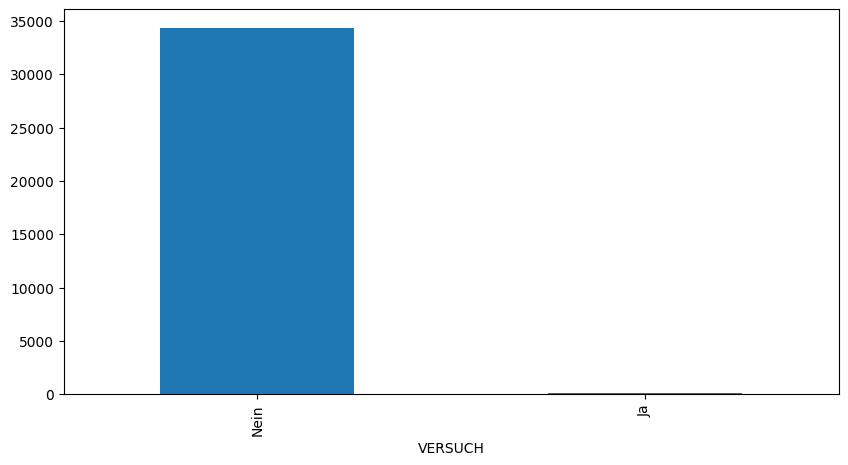

In [20]:
print(y_train.value_counts())
y_train.value_counts().plot(kind='bar', figsize=(10, 5)   )

In [21]:
df.dtypes

ANGELEGT_AM                       datetime64[ns]
TATZEIT_ANFANG_DATUM              datetime64[ns]
TATZEIT_ANFANG_STUNDE                      int64
TATZEIT_ENDE_DATUM                datetime64[ns]
TATZEIT_ENDE_STUNDE                        int64
LOR                                        int64
SCHADENSHOEHE                              int64
VERSUCH                                   object
ART_DES_FAHRRADS                          object
DELIKT                                    object
ERFASSUNGSGRUND                           object
ANGELEGT_AM_dayofweek                      int32
TATZEIT_ANFANG_DATUM_dayofweek             int32
TATZEIT_ENDE_DATUM_dayofweek               int32
ANGELEGT_AM_month                          int32
TATZEIT_ANFANG_DATUM_month                 int32
TATZEIT_ENDE_DATUM_month                   int32
ANGELEGT_AM_year                           int32
TATZEIT_ANFANG_DATUM_year                  int32
TATZEIT_ENDE_DATUM_year                    int32
dtype: object

##### we have to encode before using balancing techniques:

In [22]:
categorical_attributes=x_train.select_dtypes(include=['object']).columns.tolist()
numerical_attribute=x_train.select_dtypes(include=['int64']).columns.tolist()

categorical_attributes_test=x_test.select_dtypes(include=['object']).columns.tolist()
numerical_attribute_test=x_test.select_dtypes(include=['int64']).columns.tolist()

print(categorical_attributes , numerical_attribute)
print(categorical_attributes_test, numerical_attribute_test)

['ART_DES_FAHRRADS', 'DELIKT', 'ERFASSUNGSGRUND'] ['TATZEIT_ANFANG_STUNDE', 'TATZEIT_ENDE_STUNDE', 'LOR', 'SCHADENSHOEHE']
['ART_DES_FAHRRADS', 'DELIKT', 'ERFASSUNGSGRUND'] ['TATZEIT_ANFANG_STUNDE', 'TATZEIT_ENDE_STUNDE', 'LOR', 'SCHADENSHOEHE']


##### In practice, standardization can lead to an increased speed of learning, the data type now is "float64"

In [23]:

ct=sklearn.compose.ColumnTransformer([("standrize",sklearn.preprocessing.StandardScaler(),numerical_attribute),
                                      ("oneHot",sklearn.preprocessing.OneHotEncoder(),categorical_attributes)])


ct_test=sklearn.compose.ColumnTransformer([("standrize",sklearn.preprocessing.StandardScaler(),numerical_attribute_test),
                                      ("oneHot",sklearn.preprocessing.OneHotEncoder(),categorical_attributes_test)])

x_train_transformed=ct.fit_transform(x_train)   
x_test_transformed=ct_test.fit_transform(x_test)

print(x_train_transformed.dtype)
print(x_test_transformed.dtype)


float64
float64


##### Balancing techniques: applying SMOTE to the training data :

VERSUCH
Nein    34368
Ja      34368
Name: count, dtype: int64


<Axes: xlabel='VERSUCH'>

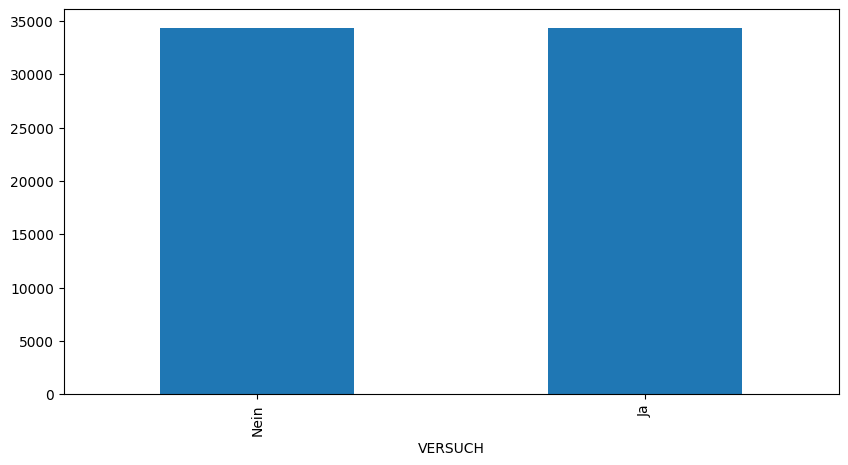

In [24]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_transformed, y_train)

print(y_train_smote.value_counts())
y_train_smote.value_counts().plot(kind='bar', figsize=(10, 5)   )


## 5.Model Training:

#### I have Selected two  machine learning algorithms suitable for binary classification, decision trees and random forests.

##### Initializing the Decision Tree Model :

In [25]:
model = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=5)


##### I have  trained the model  on the training data using the fit method :

In [26]:
model.fit(x_train_smote, y_train_smote )

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

##### Initializing the Random forests Model :

In [27]:
from sklearn.ensemble import RandomForestClassifier
Model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

##### I have  trained the model  on the training data using the fit method :

In [28]:
Model_rf.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

## 6.Model Assessment:

##### Predicting on the test set_the Decision Tree  model :

In [29]:
y_pred = model.predict(x_test_transformed)

##### Evaluating the Decision Tree  model :


In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.98852306978901


##### Predicting on the test set_Random forests Model : 

In [31]:
y_pred_rf = Model_rf.predict(x_test_transformed)

##### Evaluating the model_Random forests Model : 


In [32]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

Accuracy (Random Forest): 0.9903779271968467


## 7.The Final discussion on the overall pipeline:


### 7.1 Strengths of the solution :

**1.Comprehensive Approach:** The pipeline used follows an organized approach—starting from data collection, exploration, preprocessing, and feature engineering to model training and performance evaluation.

**2.Effective Handling of Data Quality Issues:** The pipeline takes charge of the missing values, outliers, imbalanced classes, and through taking proper actions to clean, including SMOTEs for the removal of 'unknown' values in case of class imbalance.

**3.Use of several machine learning algorithms:** The pipeline uses not only decision trees but, for instance, random forests. With such an approach, one has the flexibility to choose the model and compare its performance.

**4.Feature Engineering:** Extract relevant features like day, month, year from date/time features and encode in an appropriate way, so that it helps in enhancing the prediction power of the model.

**5.Model Explainability:** It provides a model with a clear and easily interpretable structure that gives ease in the understanding of the patterns underlying in data.

### 7.2 Limitations:

**1.Model complexity and over fitting issues resulting in poor generalization.**

**2.Poor explicit feature selection impacting model simplicity and interpretability.**


### 7.3 Implications for the Business Problem:

**1. Resource Optimization:** preventing crime by a police department and better resource allocation that can lead to improvements in public safety and decreases in financial loss.

**2.Proactive measures:** This kind of information may help police in many ways, for instance, by deploying more patrols proactively or only at some periods at certain places or by conducting information campaigns to deter thefts.

### 7.4 Data-Driven Recommendations:
**1. Focus police on predicted theft hotspots.**

**2. inform the public about high theft areas.** 

**3. Regularly update the model with new data.**

### 7.5 Most Informative Features:

 Potential informative features for predicting bicycle thefts could include:

**1.Day of the week:** Certain days may have higher theft rates due to factors like increased foot traffic.

**2.Month and year:** Seasonal variations and trends over time could impact theft rates.

**3.Location characteristics:** Features related to specific locations, such as proximity to public transportation hubs or crime hotspots, may influence theft likelihood.

### 7.6 Is my  model explainable?

Choice In essence, trees are flowcharts that show how the model makes decisions. They are easy to understand since you can see the steps that were followed to arrive at a forecast. This transparency adds to the model's predictability. We may also look at the qualities that matter most in making these decisions.

On the other hand, Random Forests require a little more explanation. Because they work like a collection of Decision Trees, they could be more challenging to comprehend. Understanding the reason for a Random Forest's forecast may need the use of more complex techniques, such as partial dependence plots or SHAP values. These methods help to break down the complex connections between attributes and predictions.



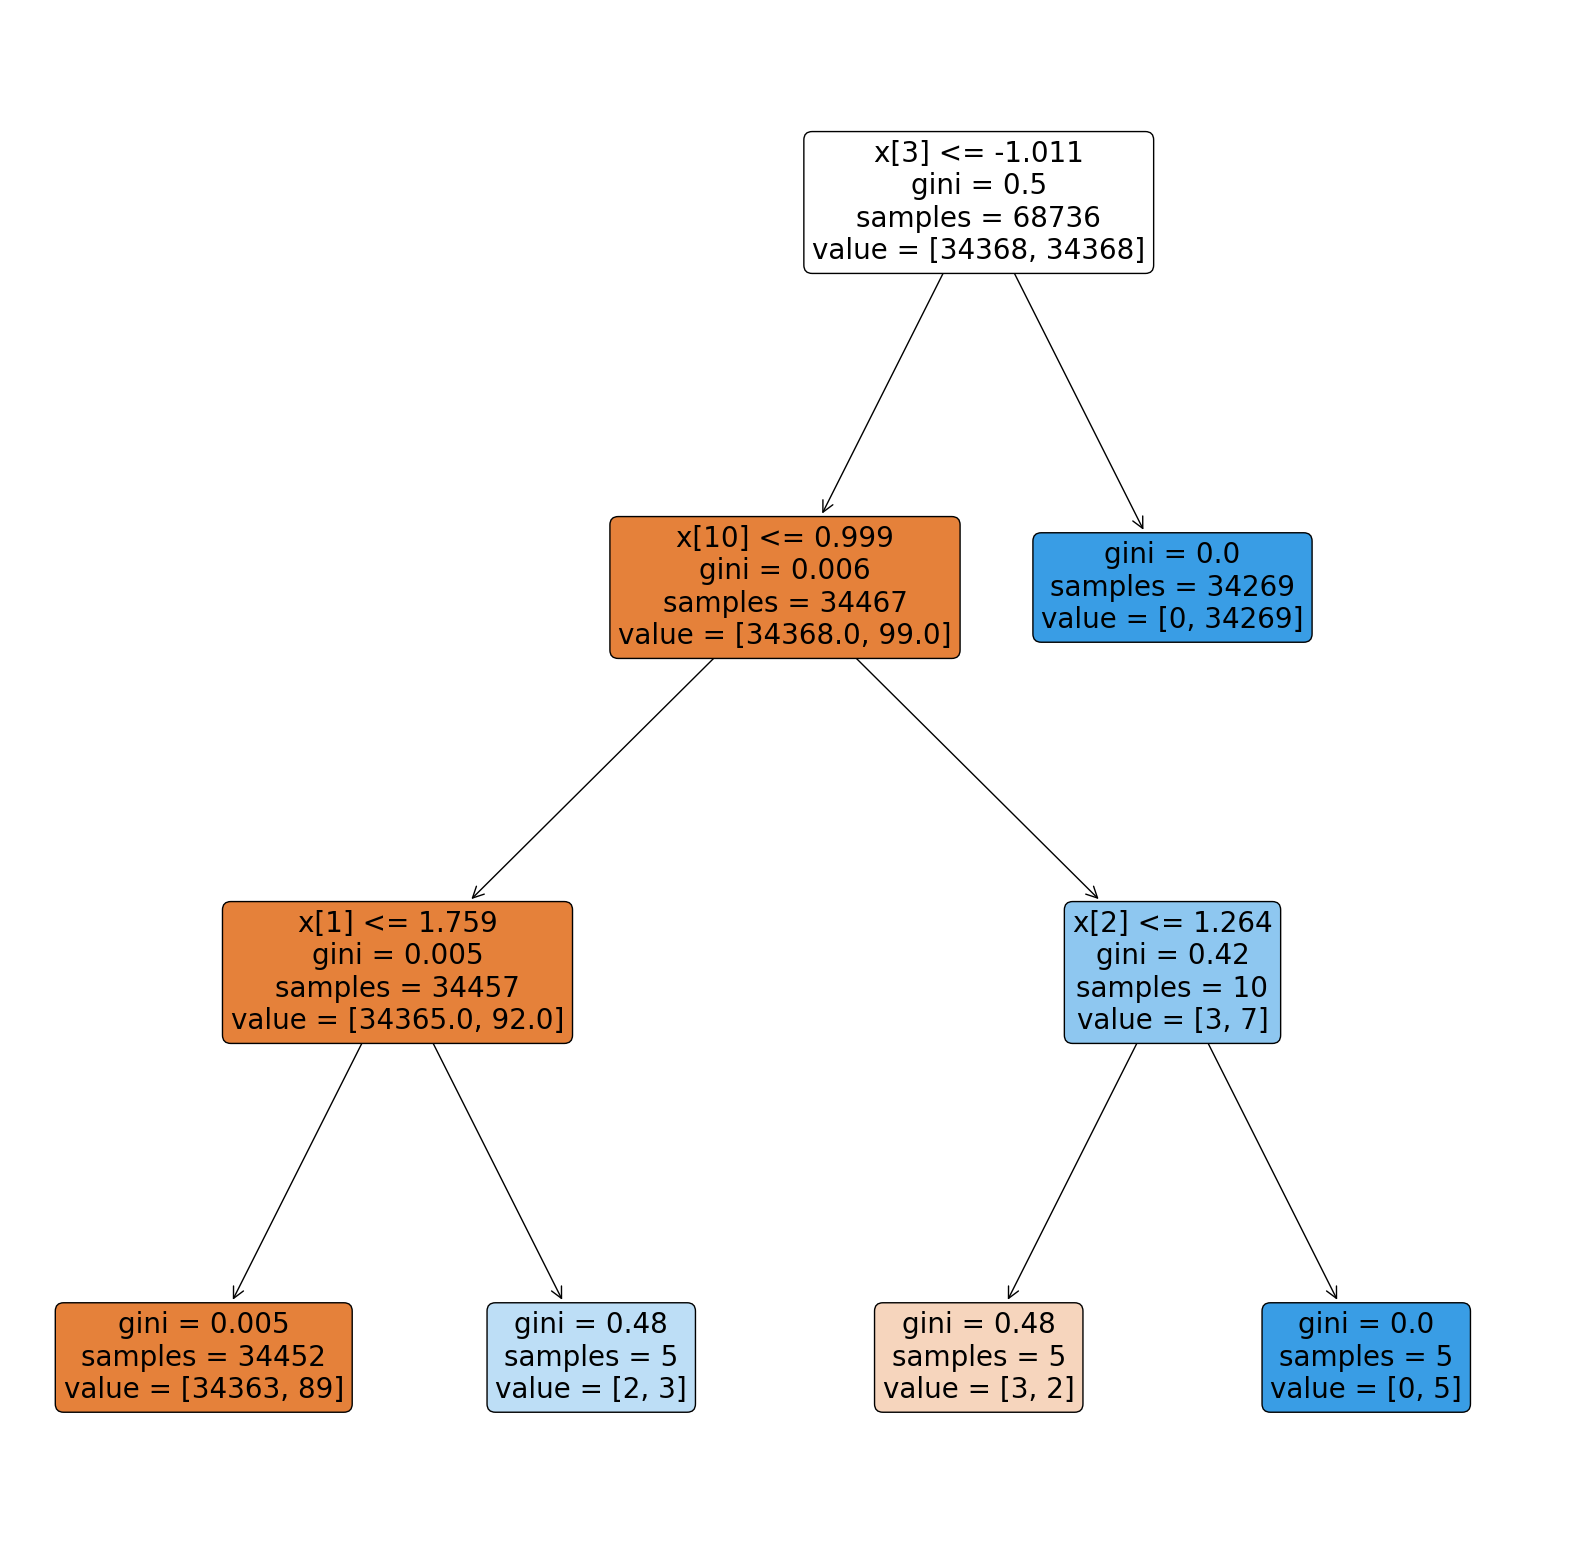

In [33]:
plt.figure(figsize=(20,20))
plot_tree(model, filled=True, rounded=True, fontsize=20)
plt.show() 